In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

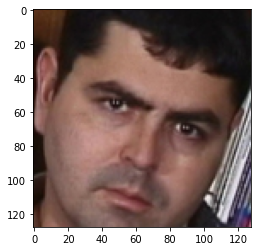

Image type: torch.FloatTensor
Image size: torch.Size([0, 3, 128, 128])


In [9]:
#https://www.cs.virginia.edu/~vicente/recognition/notebooks/image_processing_lab.html
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
%matplotlib inline

# pytorch provides a function to convert PIL images to tensors.
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()


# Read the image from file. Assuming it is in the same directory.
pil_image = Image.open('face_images/image00000.jpg')
rgb_image = pil2tensor(pil_image)


rgb_image_nimages = rgb_image[None, :, :, :]
rgb_image_nimages = rgb_image_nimages[np.zeros(len(data)), :, :, :]


# Plot the image here using matplotlib.
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    #tensor = tensor[1:3]
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

    
    
plot_image(rgb_image)

# Show the image tensor type and tensor size here.
print('Image type: ' + str(rgb_image_nimages.type()))
print('Image size: ' + str(rgb_image_nimages.size()))

In [10]:
files = glob.glob(img_dir)
for f1 in files:
    print(f1)

face_images\image00000.jpg
face_images\image00001.jpg
face_images\image00002.jpg
face_images\image00003.jpg
face_images\image00004.jpg
face_images\image00005.jpg
face_images\image00006.jpg
face_images\image00007.jpg
face_images\image00008.jpg
face_images\image00009.jpg
face_images\image00010.jpg
face_images\image00011.jpg
face_images\image00012.jpg
face_images\image00013.jpg
face_images\image00014.jpg
face_images\image00015.jpg
face_images\image00016.jpg
face_images\image00017.jpg
face_images\image00018.jpg
face_images\image00019.jpg
face_images\image00020.jpg
face_images\image00021.jpg
face_images\image00022.jpg
face_images\image00023.jpg
face_images\image00024.jpg
face_images\image00025.jpg
face_images\image00026.jpg
face_images\image00027.jpg
face_images\image00028.jpg
face_images\image00029.jpg
face_images\image00030.jpg
face_images\image00031.jpg
face_images\image00032.jpg
face_images\image00033.jpg
face_images\image00034.jpg
face_images\image00035.jpg
face_images\image00036.jpg
f

In [11]:
import cv2
import os
import glob
img_dir = "face_images/*"
files = glob.glob(img_dir)
data = []

for f1 in files:
    #img = cv2.imread(f1,cv2.COLOR_RGB2BGR)
    # Read the image from file. Assuming it is in the same directory.
    pil_image = Image.open(f1)
    rgb_image = pil2tensor(pil_image)
    #rgb_image_nimages = rgb_image[None, :, :, :]
    #rgb_image_nimages = rgb_image_nimages[np.zeros(len(data)), :, :, :]

#     img = cv2.resize(img, (16,16))
    data.append(rgb_image)


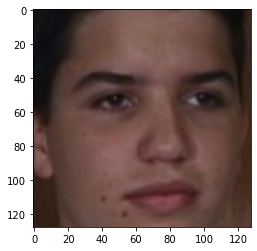

In [13]:
plot_image(data[1])

In [25]:

rgb_image_nimages.size()

torch.Size([751, 3, 128, 128])

In [62]:
import torchvision

def resize_tensor(input_tensors, h, w):
    final_output = None
    batch_size, channel, height, width = input_tensors.shape
    input_tensors = torch.squeeze(input_tensors, 1)

    for img in input_tensors:

        img_PIL = transforms.ToPILImage()(img)
        img_PIL = torchvision.transforms.Resize([h,w])(img_PIL)
        img_PIL = torchvision.transforms.ToTensor()(img_PIL)

        if final_output is None:
            final_output = img_PIL

        else:

            final_output = torch.cat((final_output, img_PIL), 0)
        final_output = torch.unsqueeze(final_output, 1)

    return final_output
    

In [63]:
size = resize_tensor(rgb_image_nimages,64,48)

RuntimeError: Tensors must have same number of dimensions: got 4 and 3

In [75]:
input_tensors = rgb_image_nimages
final_output = None
batch_size, channel, height, width = input_tensors.shape
input_tensors = torch.squeeze(input_tensors, 1)

In [78]:
img_PIL = transforms.ToPILImage()(input_tensors)
img_PIL = torchvision.transforms.Resize([h,w])(img_PIL)
img_PIL = torchvision.transforms.ToTensor()(img_PIL)

if final_output is None:
    final_output = img_PIL

else:

    final_output = torch.cat((final_output, img_PIL), 0)
final_output = torch.unsqueeze(final_output, 1)

ValueError: pic should be 2/3 dimensional. Got 4 dimensions.